<img src="https://cio.com.br/wp-content/uploads/2019/02/RH_1030536982.jpg">

Não é novidade que com a chegada da pandemia milhões de brasileiros viram as portas de trabalho se fechar. Serviços de alimentação, fabricação de veículos automotores, transportes aéreos, hotéis, dentre outras atividades de emprego entraram nas estatísticas dos setores econômicos que mais sofreram o impacto da pandemia da COVID-19 no Brasil, segundo o site do Governo Federal (MINISTÉRIO DA ECONOMIA, 2020). Contudo, houve setores que mostraram um grande aumento em novas contratações, principalmente, no setor tecnológico. As empresas passaram a ter uma rotatividade de profissionais significativamente grande. 
Nesse sentido, o objetivo deste projeto é desenvolver um sistema de identificação de pessoas que podem deixar a empresa. Assim, a equipe de RH poderá se antecipar a possível saída de um funcionário ao propor algum tipo de incentivo. 
Será utilizada duas técnicas de aprendizado de máquina, a saber: KNN, método de classificação e Decision Tree, método utilizado como árvore de decisão. Após serem avaliadas entre si, o método que apresentar melhor acurácia será a escolhida.

Fonte:https://www.gov.br/economia/pt-br/assuntos/noticias/2020/setembro/ministerio-da-economia-divulga-lista-dos-setores-mais-afetados-pela-pandemia-da-covid-19-no-brasil

In [250]:
# importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('C:\\Users\\Victor Santos\\Desktop\\IMPACTA\\modelagem_rh.csv')

In [252]:
df

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Análise descritiva do conjuntos de dados

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [254]:
df.describe()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos
count,14978.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612828,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248795,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Verificação de valores ausentes

In [255]:
df.isnull().sum().sort_values(ascending=False)

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [256]:
# Exclusão de observações ausentes

df.dropna(inplace=True)

In [257]:
df.isnull().sum().sort_values(ascending=False)

nivel_satisfacao      0
ult_avaliacao         0
num_projetos          0
media_horas_mes       0
tempo_empresa         0
aci_trabalho          0
saiu                  0
promocao_ult_5anos    0
departamento          0
salario               0
dtype: int64

### Frequência de pessoas que saíram e permaneceram na empresa

In [258]:
frequencia = df.saiu.value_counts()

In [259]:
porcentagem = frequencia / len(df) * 100
porcentagem

0    76.205101
1    23.794899
Name: saiu, dtype: float64

([<matplotlib.axis.XTick at 0x22ba2b91730>,
 [Text(0, 0, 'Não saiu'), Text(1, 0, 'Saiu')])

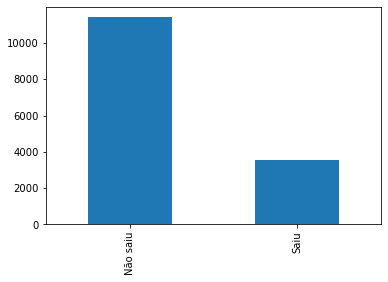

In [260]:
frequencia.plot(kind='bar')
plt.xticks((0,1), ['Não saiu', 'Saiu'])

### Frequência de saída por departamento - tabela cruzada

In [261]:
valores = pd.crosstab(df['departamento'], df['saiu'])

print(valores)

saiu             0     1
departamento            
IT             954   273
RandD          666   121
accounting     563   204
management     539    91
marketing      652   202
product_mng    703   198
rh             524   214
sales         3117  1010
support       1673   555
technical     2023   696


In [262]:
soma = valores.sum(axis=1)
print(soma)

departamento
IT             1227
RandD           787
accounting      767
management      630
marketing       854
product_mng     901
rh              738
sales          4127
support        2228
technical      2719
dtype: int64


In [263]:
freq = valores.divide(soma, axis=0) * 100
print(round(freq,2))

saiu              0      1
departamento              
IT            77.75  22.25
RandD         84.63  15.37
accounting    73.40  26.60
management    85.56  14.44
marketing     76.35  23.65
product_mng   78.02  21.98
rh            71.00  29.00
sales         75.53  24.47
support       75.09  24.91
technical     74.40  25.60


In [264]:
porcentagem_dept =  freq 

<AxesSubplot:xlabel='departamento'>

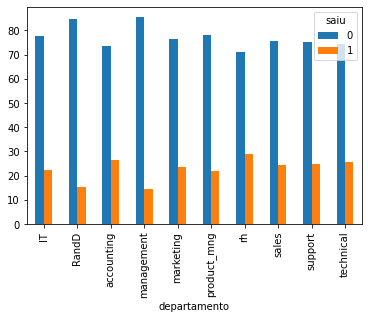

In [265]:
porcentagem_dept.plot(kind="bar")

### Criando variáveis dummies

In [266]:
df = pd.get_dummies(df, drop_first=True )

In [267]:
df.head(2000)

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_management,departamento_marketing,departamento_product_mng,departamento_rh,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0.82,0.67,2,202,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2002,0.45,0.69,5,193,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2003,0.78,0.82,5,247,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2004,0.49,0.60,3,214,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Normalizando os dados

In [268]:
pd.DataFrame([df.max(), df.min()], index= ["max", "min"])

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_management,departamento_marketing,departamento_product_mng,departamento_rh,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
max,1.00,1.00,7.0,310.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [269]:
pd.DataFrame([df.max(), df.min()], index= ["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [270]:
from sklearn import preprocessing

In [271]:
x = df.values
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [272]:
min_max_scaler = preprocessing.MinMaxScaler()

In [273]:
df_new = min_max_scaler.fit_transform(x)

In [274]:
df_new

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [275]:
# Dataset normalizado

df = pd.DataFrame(data= df_new, columns=df.columns)

In [276]:
df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_management,departamento_marketing,departamento_product_mng,departamento_rh,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [277]:
# Transporndo as variáveis para melhor visulização após a normalização

pd.DataFrame([df.max(), df.min()], index= ["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


In [278]:
df.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_management,departamento_marketing,departamento_product_mng,departamento_rh,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Construção dos modelos

In [279]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

In [280]:
df.columns

Index(['nivel_satisfacao', 'ult_avaliacao', 'num_projetos', 'media_horas_mes',
       'tempo_empresa', 'aci_trabalho', 'saiu', 'promocao_ult_5anos',
       'departamento_RandD', 'departamento_accounting',
       'departamento_management', 'departamento_marketing',
       'departamento_product_mng', 'departamento_rh', 'departamento_sales',
       'departamento_support', 'departamento_technical', 'salario_low',
       'salario_medium'],
      dtype='object')

In [281]:
# Realocando a variável "saiu" para última posição

df = df.reindex(columns=['nivel_satisfacao', 'ult_avaliacao', 'num_projetos', 'media_horas_mes',
       'tempo_empresa', 'aci_trabalho', 'promocao_ult_5anos',
       'departamento_RandD', 'departamento_accounting', 'departamento_rh',
       'departamento_management', 'departamento_marketing',
       'departamento_product_mng', 'departamento_sales',
       'departamento_support', 'departamento_technical', 'salario_low',
       'salario_medium','saiu'])

In [282]:
X = df.iloc[:, :-1]
y = df.iloc[:, 18]

### Treinamento do modelo KNN

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [284]:
knn = KNeighborsClassifier(n_neighbors=3, leaf_size=4)

In [285]:
# Dividindo o dataset em treino e teste ( 80% teste, 20% treino)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [286]:
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=4, n_neighbors=3)

In [287]:
predicted = knn.predict(X_test)

In [288]:
accuracy_score(predicted,y_test)

0.9559412550066756

In [289]:
confusion_matrix(predicted, y_test)

array([[2201,   39],
       [  93,  663]], dtype=int64)

### Treinando modelo Decision Tree

In [290]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
tree = DecisionTreeClassifier(random_state=2, max_depth=3)

In [292]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [293]:
accuracy_score(tree.predict(X_test), y_test)

0.9576101468624834

In [294]:
confusion_matrix(tree.predict(X_test), y_test)

array([[2219,   52],
       [  75,  650]], dtype=int64)

### Validação cruzada dos modelos

In [295]:
from sklearn.model_selection import cross_val_score

In [296]:
# KNN
scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

In [297]:
scores_knn

array([0.96662216, 0.93124166, 0.93457944, 0.95692821, 0.9509182 ])

In [298]:
# Média de validação cruzada knn

scores_knn.mean()

0.9480579336722753

In [299]:
# Desvio padrão

scores_knn.std()

0.013386191408348846

In [300]:
# Decision Tree

scores_tree = cross_val_score(tree, X, y, cv=5, scoring='accuracy')

In [301]:
scores_tree

array([0.96728972, 0.96128171, 0.95927904, 0.96293823, 0.91352254])

In [302]:
# média de validação cruzada decision tree

scores_tree.mean()

0.9528622470472594

In [303]:
# Desvio padrão decision tree

scores_tree.std()

0.019846171930905317

In [304]:
tree.feature_importances_

array([0.60565997, 0.14157733, 0.10372303, 0.00514267, 0.143897  ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

<AxesSubplot:>

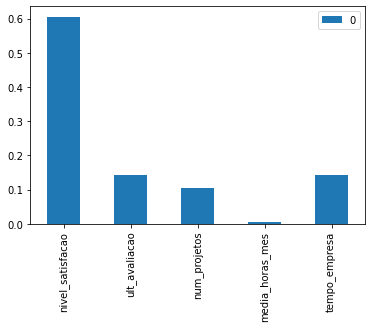

In [305]:
pd.DataFrame(tree.feature_importances_, index=X.columns)[:5].plot(kind="bar")

### Deploy

In [306]:
import pickle

In [307]:
tree.fit(X,y)

DecisionTreeClassifier(max_depth=3, random_state=2)

In [308]:
pickle.dump(tree, open("modelo_rh.pickle", "wb"))

In [309]:
tree_salva = pickle.load(open("modelo_rh.pickle", "rb"))

In [310]:
tree_salva

DecisionTreeClassifier(max_depth=3, random_state=2)

In [311]:
tree_salva.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])